In [1]:
!pip install transformers datasets torch tensorflow
!pip install plotly
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from transformers import BertTokenizer

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Example text data (comments from viewers)
comments = ["This stream is amazing!", "The quality is horrible!", "I'm loving the gameplay."]

# Tokenize the comments
encodings = tokenizer(comments, truncation=True, padding=True)

print(encodings)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

{'input_ids': [[101, 2023, 5460, 2003, 6429, 999, 102, 0, 0], [101, 1996, 3737, 2003, 9202, 999, 102, 0, 0], [101, 1045, 1005, 1049, 8295, 1996, 11247, 1012, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1]]}


In [3]:
from transformers import BertForSequenceClassification

# Load pre-trained BERT model for sentiment classification (binary sentiment: positive, negative)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Example comment data
inputs = tokenizer(comments, return_tensors='pt', padding=True, truncation=True)

# Predict sentiment
outputs = model(**inputs)
logits = outputs.logits
print(logits)


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tensor([[-0.2150, -0.3607],
        [-0.2143, -0.2430],
        [-0.1786, -0.1704]], grad_fn=<AddmmBackward0>)


In [4]:
from datasets import Dataset
import pandas as pd
from transformers import BertTokenizer

# Sample data (replace this with your real streaming sentiment dataset)
train_texts = ['Great stream!', 'Very poor quality!', 'Amazing gameplay!', 'Not watchable at all']
train_labels = [1, 0, 1, 0]  # 1 = Positive, 0 = Negative

# Create a DataFrame
df = pd.DataFrame({'text': train_texts, 'label': train_labels})

# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df)

# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenization function
def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

# Tokenize the dataset
tokenized_dataset = dataset.map(tokenize_function, batched=True)

# Set format to torch for use with Trainer
tokenized_dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

In [5]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

# Convert data to NumPy arrays
train_data_dnn = np.array([[0.8, 1], [0.5, 0], [0.7, 1], [0.2, 0]])  # Stream quality + sentiment score
train_labels_dnn = np.array([2, 0, 2, 1])  # Satisfaction levels (e.g., 0: Low, 1: Medium, 2: High)

# Define the neural network model
model_dnn = Sequential([
    Input(shape=(2,)),  # Input layer with 2 features
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='softmax')  # Output for 3 satisfaction classes
])

# Compile the model
model_dnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_dnn.fit(train_data_dnn, train_labels_dnn, epochs=10, batch_size=32)


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.2500 - loss: 1.1929
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.5000 - loss: 1.1802
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2500 - loss: 1.2836
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 1.1796
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5000 - loss: 1.1718
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.0000e+00 - loss: 1.2151
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.2500 - loss: 1.1378
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0000e+00 - loss: 1.1726
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0000e+00 - loss: 1.1901
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0000e+00 - loss: 1.1404


In [6]:
import numpy as np

# Example test data (replace with your actual test features and labels)
test_data_dnn = np.array([[0.9, 1], [0.6, 0], [0.4, 1], [0.1, 0]])
test_labels_dnn = np.array([2, 1, 1, 0])

# Evaluate the model
evaluation = model_dnn.evaluate(test_data_dnn, test_labels_dnn)
print(f"Test Loss: {evaluation[0]}, Test Accuracy: {evaluation[1]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.5000 - loss: 1.0993
Test Loss: 1.0993260145187378, Test Accuracy: 0.5


In [7]:
import numpy as np

# Example input data (stream quality and sentiment score)
input_data = np.array([[0.7, 1]])

# Predict satisfaction level using the trained model
predicted_satisfaction = model_dnn.predict(input_data)

# Get the satisfaction class (0, 1, or 2) with the highest probability
satisfaction_class = predicted_satisfaction.argmax(axis=-1)

# Print the predicted satisfaction level
print(f"Predicted Satisfaction Level: {satisfaction_class[0]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted Satisfaction Level: 1


In [8]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.3 MB/s eta 0:00:00


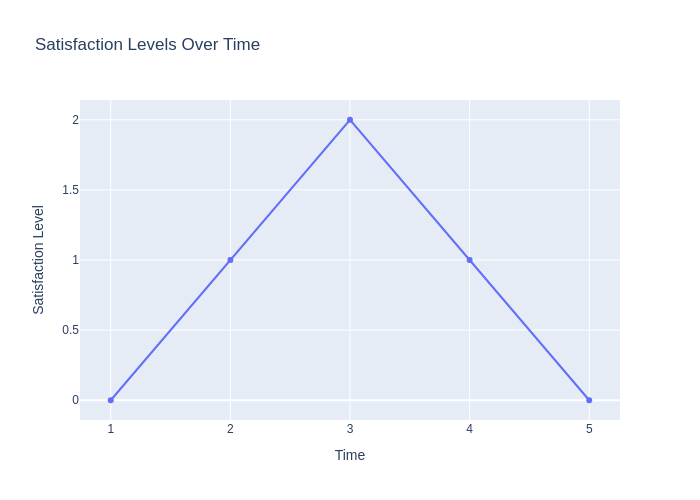

In [9]:
import plotly.graph_objects as go

# Sample data for visualization (stream quality vs. satisfaction)
times = [1, 2, 3, 4, 5]  # Example timestamps
satisfaction = [0, 1, 2, 1, 0]  # Example satisfaction levels (0 = Low, 1 = Medium, 2 = High)

# Plot the satisfaction levels over time
fig = go.Figure(data=[go.Scatter(x=times, y=satisfaction, mode='lines+markers')])
fig.update_layout(title="Satisfaction Levels Over Time", xaxis_title="Time", yaxis_title="Satisfaction Level")

# Force rendering as static image (for GitHub preview compatibility)
fig.show(renderer='png')
